In [3]:
import pygetdata as gd
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c

In [6]:
blast2012path = 'data/blast2020/FLIGHT/flight_data/master_2020-01-06-06-21-22/'

In [7]:
data = gd.dirfile(blast2012path+'x_mag1_n', gd.RDONLY)

IOError: b'Error opening /home/user/data/blast2020/FLIGHT/flight_data/master_2020-01-06-06-21-22/x_mag1_n/format: Not a directory'

# Interesting quantities
DECLINATION_MAG  LINCOM 1 declination_mag  5.493164062500e-03 
MAGLIMIT_ISC     LINCOM 1 maglimit_isc     1.000000000000e-03 0.000000000000e+00
az_raw_mag       RAW    u 1
AZ_RAW_MAG       LINCOM 1 az_raw_mag       5.493164062500e-03 0.000000000000e+00
sigma_mag        RAW    u 1
SIGMA_MAG        LINCOM 1 sigma_mag        5.493164062500e-03 0.000000000000e+00
az_mag           RAW    u 1
AZ_MAG           LINCOM 1 az_mag           5.493164062500e-03 0.000000000000e+00
maglimit_osc     RAW    u 1
MAGLIMIT_OSC     LINCOM 1 maglimit_osc     1.000000000000e-03 0.000000000000e+00
cal_xmax_mag     RAW    u 1
CAL_XMAX_MAG     LINCOM 1 cal_xmax_mag     1.000000000000e+00 0.000000000000e+00
cal_xmin_mag     RAW    u 1
CAL_XMIN_MAG     LINCOM 1 cal_xmin_mag     1.000000000000e+00 0.000000000000e+00
cal_ymax_mag     RAW    u 1
CAL_YMAX_MAG     LINCOM 1 cal_ymax_mag     1.000000000000e+00 0.000000000000e+00
cal_ymin_mag     RAW    u 1
CAL_YMIN_MAG     LINCOM 1 cal_ymin_mag     1.000000000000e+00 0.000000000000e+00
trim_mag         RAW    s 1
TRIM_MAG         LINCOM 1 trim_mag         5.493164062500e-03 0.000000000000e+00
pitch_mag        RAW    u 1
PITCH_MAG        LINCOM 1 pitch_mag        5.493164062500e-03 0.000000000000e+00
offset_ifrollmag_gy RAW    s 1
OFFSET_IFROLLMAG_GY LINCOM 1 offset_ifrollmag_gy 3.051757812500e-05 0.000000000000e+00
offset_ifyawmag_gy RAW    s 1
OFFSET_IFYAWMAG_GY LINCOM 1 offset_ifyawmag_gy 3.051757812500e-05 0.000000000000e+00
z_mag            RAW    u 1
Z_MAG            LINCOM 1 z_mag            1.000000000000e+00 0.000000000000e+00
x_mag            RAW    u 20
X_MAG            LINCOM 1 x_mag            1.000000000000e+00 0.000000000000e+00
y_mag            RAW    u 20
Y_MAG            LINCOM 1 y_mag            1.000000000000e+00 0.000000000000e+00

In [11]:
az_mag = data.getdata('AZ_MAG') # Azimuth derived from magnetometer
x_mag = data.getdata('X_MAG')
y_mag = data.getdata('Y_MAG')
z_mag = data.getdata('Z_MAG')
x_mag.shape

(117491880,)

In [13]:
x_mag.shape[0]/t.shape[0]

20.0

In [9]:
t = data.getdata('TIME')
t.shape

(5874594,)

In [6]:
dday = ((t - t[0])*u.s).to(u.day)

In [15]:
np.median(z_mag)

32780.0

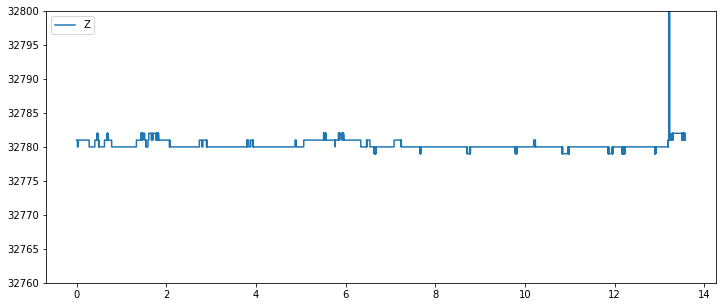

In [20]:
# The Z component of the magnetometer is sampled at 1 Hz, 
# and doesn't seem to do anything interesting.  There's one glitch at the end.
plt.figure(figsize=(12,5))
plt.plot(dday, z_mag, label='Z')
plt.ylim(32760,32800)
plt.legend()
plt.show()